In [100]:
import pandas as pd
import gdown
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# file_id = "1gPd7ginXt7jq0Ef4ZZvLCXBuAAWEu7wA"       
# # Para saber esto cojo el link entero -> https://drive.google.com/file/d/1gPd7ginXt7jq0Ef4ZZvLCXBuAAWEu7wA/view?usp=sharing y corto para tener solo la parte de id (entre /d/ y /view?)
# download_url = f'https://drive.google.com/uc?id={file_id}'
output = 'datos_amazon.csv'
# gdown.download(download_url, output, quiet=False)

## LAS COSAS CON COMENTS SOLO UNA VEZ PARA DESCARGARLO AL PC


df_amazon = pd.read_csv(output)

In [101]:
df_amazon.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [102]:
# Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

# 1.1.a) Generate a frequency table for the product category.

frequency_table = df_amazon['category'].value_counts()

proportion_table = df_amazon['category'].value_counts(normalize=True)

frequency_table, proportion_table


(category
 Sports & Outdoors                         836265
 Beauty                                     19312
 Handmade Clothing, Shoes & Accessories     19229
 Bath & Body                                19092
 Birthday Gifts                             18978
                                            ...  
 Alexa Built-In Devices                       107
 Motorbike Chassis                            107
 Plugs                                        107
 Smart Home Security & Lighting               104
 Smart Speakers                                54
 Name: count, Length: 296, dtype: int64,
 category
 Sports & Outdoors                         0.342219
 Beauty                                    0.007903
 Handmade Clothing, Shoes & Accessories    0.007869
 Bath & Body                               0.007813
 Birthday Gifts                            0.007766
                                             ...   
 Alexa Built-In Devices                    0.000044
 Motorbike Chassis       

In [103]:
# 1.1.b) Which are the top 5 most listed product categories?
prod_most_listed = []

prod_most_listed = [frequency_table.index[x] for x in range(5)]

prod_most_listed


['Sports & Outdoors',
 'Beauty',
 'Handmade Clothing, Shoes & Accessories',
 'Bath & Body',
 'Birthday Gifts']

<Axes: xlabel='category'>

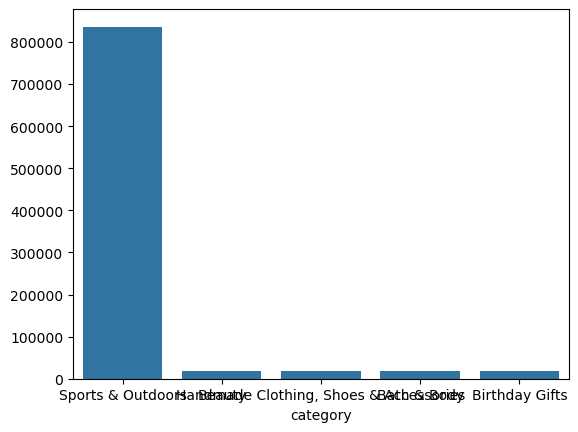

In [104]:
# 1.2.a) Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.

sns.barplot(x=frequency_table[:5].index, y=frequency_table[:5].values)


In [105]:
frequency_table[:5].value_counts

<bound method IndexOpsMixin.value_counts of category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64>

<Axes: ylabel='count'>

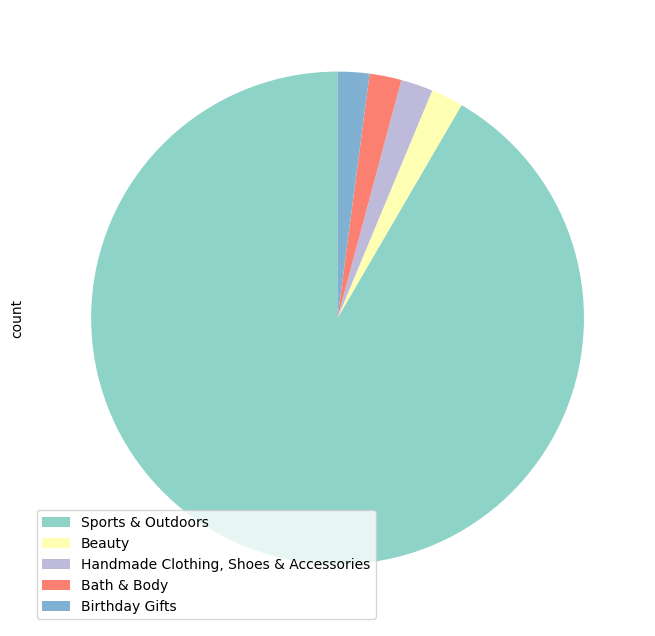

In [106]:
# 1.2.b) For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

plt.figure(figsize=(10, 8))
frequency_table[:5].plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"), textprops={'visible': False}, legend=True)


In [107]:
# Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

# 2.1.a) Calculate the mean, median, and mode for the price of products.

prices_mean = df_amazon["price"].mean()
prices_median = df_amazon["price"].median()
prices_mode = stats.mode(df_amazon["price"])

print(f"The mean is {prices_mean}, the median {prices_median} and the mode {prices_mode}")

The mean is 89.24380943923663, the median 19.09 and the mode ModeResult(mode=9.99, count=48922)


2.1.b) What's the average price point of products listed? How does this compare with the most common price point (mode)?

The average price is 89.24, but the most common price point is 9.99. This means there are some outliers in the form of enormous prices that significantly increase the mean.

In [108]:
# 2.2.a) Determine the variance, standard deviation, range, and interquartile range for product price.

amazon_var = df_amazon["price"].var()
amazon_std = df_amazon["price"].std()
amazon_range = df_amazon["price"].max() - df_amazon["price"].min()
amazon_IQR = df_amazon["price"].quantile(0.75) - df_amazon["price"].quantile(0.25)

print(f"""
Variance = {amazon_var}
Standard deviation = {amazon_std}
Range = {amazon_range}
Interquartile range = {amazon_IQR}      
    """)


Variance = 119445.48532256528
Standard deviation = 345.60886175352226
Range = 100000.0
Interquartile range = 36.0      
    


In [109]:
inf_limit = df_amazon["price"].quantile(0.25) - 1.5*amazon_IQR
inf_limit
# Result is -44.01, we are talking about money so we convert it to 0. That means there are free products on amazon. Every product below that price is an outlier (impossible in this case) 

-44.01

In [110]:
sup_limit = df_amazon["price"].quantile(0.75) + 1.5*amazon_IQR
sup_limit
# Result is 99.99. Every value above this is an outlier.

99.99000000000001

2.2.b) How varied are the product prices? Are there any indicators of a significant spread in prices?

Una varianza tan alta indica que hay una gran dispersión en los precios alrededor de la media.
La desviacion estandar tan alta indica que los precios se desvian de la media en unos 345,61 dolares (suponiendo que sea esa la moneda)
El rango indica que entre el producto más caro y más barato hay una diferencia de 100.000 dolares
El rango de intercuartil es muy pequeño comparado con el rango total indicando que la mayoria de datos (la mitad) se concentran en un rango más estrecho, de 36 dolares de diferencia. Esta diferencia es entre el valor más pequeño y el más grande de dentro de los dos cuartiles. Este rango tan pequeño, comparado con el rango total y la gran desviación, refuerza la idea de que algunos valores extremos están influyendo en las medidas.

<Axes: xlabel='price', ylabel='Count'>

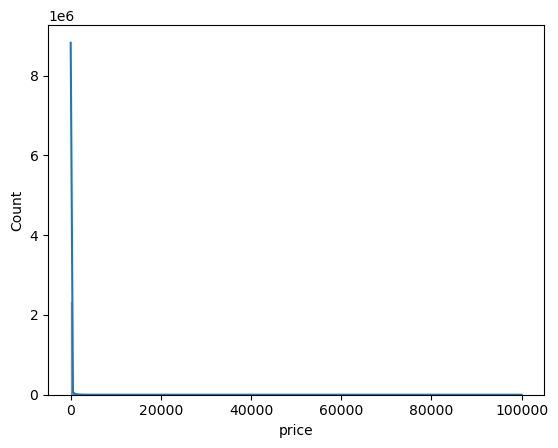

In [111]:
# 2.3.a) Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved...

sns.histplot(df_amazon['price'], kde=True, bins=300)


In [112]:
df_amazon['price'].value_counts()

price
9.99       48922
12.99      38823
8.99       34058
7.99       33632
14.99      32570
           ...  
2398.99        1
1453.08        1
1785.63        1
1347.36        1
317.34         1
Name: count, Length: 82916, dtype: int64

<Axes: ylabel='price'>

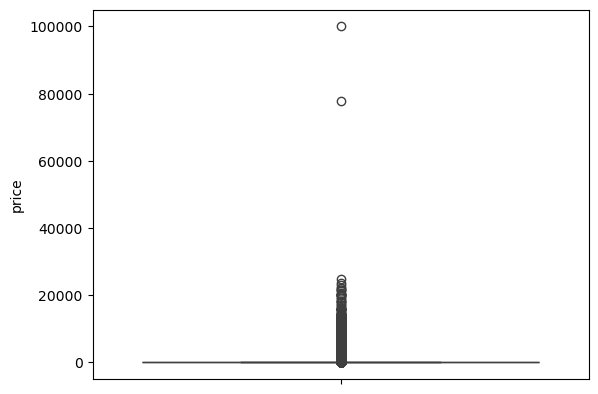

In [113]:
# 2.3.b) Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

sns.boxplot(data = df_amazon['price'])

# YES, there are.

In [114]:
df_amazon['price']

0          21.99
1          23.99
2          21.99
3          31.99
4          17.99
           ...  
2443646    22.34
2443647    97.99
2443648    52.99
2443649    79.99
2443650    53.99
Name: price, Length: 2443651, dtype: float64

In [115]:
# 3.1.a) Calculate the mean, median, and mode for the rating of products.
from scipy import stats

stars_mean = df_amazon["stars"].mean()
stars_median = df_amazon["stars"].median()
stars_mode = stats.mode(df_amazon["stars"])[0]

print(f"The mean is {stars_mean}, the median {stars_median} and the mode {stars_mode}")

The mean is 2.152836472966065, the median 0.0 and the mode 0.0


3.1.b) How do customers generally rate products? Is there a common trend?

With a 0.0.

In [116]:
# 3.2.a) Determine the variance, standard deviation, and interquartile range for product rating.

amazon_var_rating = df_amazon["stars"].var()
amazon_std_rating = df_amazon["stars"].std()
amazon_range_rating = df_amazon["stars"].max() - df_amazon["stars"].min()
amazon_IQR_rating = df_amazon["stars"].quantile(0.75) - df_amazon["stars"].quantile(0.25)

print(f"""
Variance = {amazon_var_rating}
Standard deviation = {amazon_std_rating}
Range = {amazon_range_rating}
Interquartile range = {amazon_IQR_rating}      
    """)


Variance = 4.81743402976196
Standard deviation = 2.1948653785054697
Range = 5.0
Interquartile range = 4.4      
    


In [117]:
# 3.3.a) Calculate the skewness and kurtosis for the rating column.

skewness_rating = df_amazon["stars"].skew()
kurtosis_rating = df_amazon["stars"].kurtosis()

print(f"""
Skewness = {skewness_rating}
Kurtosis = {kurtosis_rating}
    """)


Skewness = 0.08120735761080985
Kurtosis = -1.9260061280432985
    


3.3.b) Are the ratings normally distributed, or do they lean towards higher or lower values?

Un Skewness de 0.081 aprox, me indica que la distribución de los datos es casi simétrica. 0 indicaria simetria perfecta. 
Kurtosis = -1.9260061280432985 (menor que 0) indica que la distribución de los datos es platicúrtica, es decir, tiene una forma más plana que una distribución normal (Gaussiana). Esto significa que hay más valores extremos (outliers) en la distribución que en una distribución normal.

<Axes: xlabel='stars', ylabel='Count'>

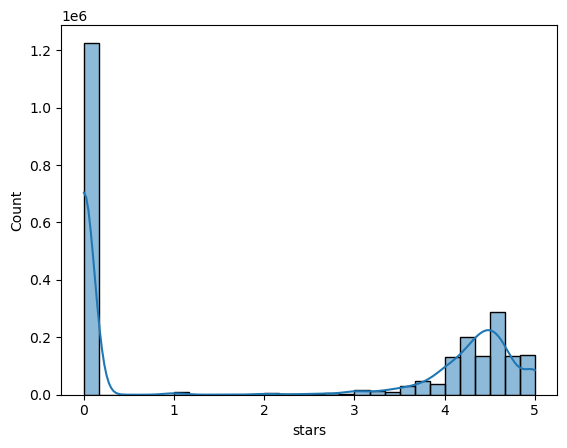

In [118]:
# 3.4) Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?
sns.histplot(df_amazon['stars'], kde=True, bins=30)

# The most common rating is 0

<Axes: xlabel='stars', ylabel='Density'>

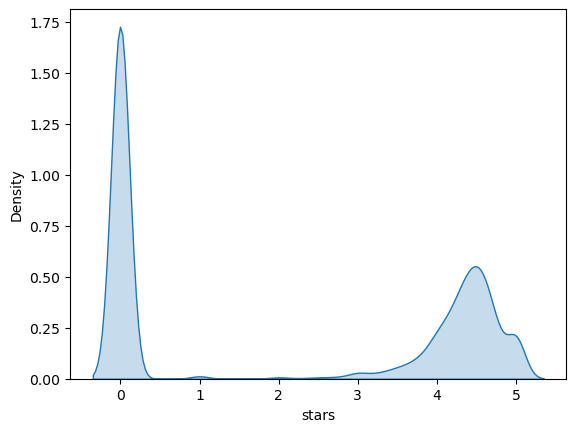

In [119]:
sns.kdeplot(data = df_amazon['stars'], fill = True)